In [1]:
import random # psuedo randomness generator
import numpy as np # import numerical python
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from cadCAD.configuration import Configuration

#imported some addition utilities to help with configuration set-up
from cadCAD.configuration.utils import config_sim
from cadCAD.configuration import append_configs
#from cadCAD import configs

In [2]:
# What does this do?
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})


In [3]:
# Params

initial_conditions = {
    'village_folk': {i:{'stuff': np.random.randint(1,10), 'tokens':0} for i in range(16)}, # initialize village folk and their stuff and cred_castle balances
    'castle': 0, # the cred castle
    'castle_token_supply': 0, # the amount of castle tokens
}

In [4]:
# Everyone in CredLand is crazy 
def villagers_be_crazy(params, step, sL, s):
    n = len(s['village_folk']) #get the length of the list of villager indices
    #print('go crazy')
    index = np.random.randint(0, n) #pick a random integer from (0,.., n-1)
    effort = 2**np.random.randint(0,4)
#     p = np.random.randint(55, 60)
#     if (p < 50):
#         #print("if 1")
#         action = 'buy_castle_token'
#         #i need to buy FROM someone
#         #select the set of village_folk who have tokens
#         holders = [i for i in range(n) if s['village_folk'][i]['tokens']>0]
#         if len(holders)>0:
#             friend = np.random.choice(holders)
#         else:
#             action = None
#             friend = None
        

    #you cannot sell tokens you don't have
#     elif (p > 80)&(s['village_folk'][index]['tokens']>0):
#         #print("if 2")
#         action = 'sell_castle_token'
#         #i need to sell TO someone
#         #select the set of village_folk who have stuff
#         stuff_havers = [i for i in range(n) if s['village_folk'][i]['stuff']>0]
#         friend = np.random.choice(stuff_havers)
    
        #print("if 3")
    
    #print("Carry out %s for villager %s" % (action, index))
    #print(s['village_folk'][index])
    return ({'villager': index, 'amount':effort})

#    return (x, y)

In [5]:
def diminishing_returns_rule(amount_of_contribution, force_int=True):
    
    x = amount_of_contribution
    if x<=0:
        y = 0
    else:
        y = 1+np.log2(x)
    
    if force_int:
        amount_of_tokens = int(y)
    else:
        amount_of_tokens = y
    
    return amount_of_tokens

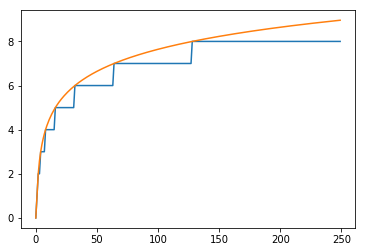

In [6]:
x = range(250)
y1 = [diminishing_returns_rule(v) for v in x]
y2 = [diminishing_returns_rule(v, force_int=False) for v in x]

plt.plot(x,y1,x,y2)

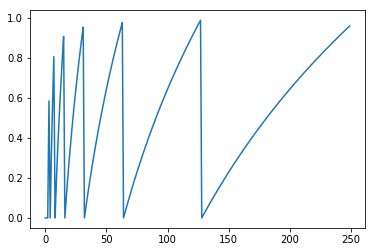

In [7]:
err = np.array(y2)-np.array(y1)
plt.plot(x,err)

In [8]:
# How villagers build the castle 
def build_castle(params, step, sL, s, _input):
    amount = _input['amount']
    #print(action)
    y = 'castle' #this function updates the castle state
    x = s[y]
    x += amount
    #print(y)
    #print(x)
    return (y, x)

In [9]:
def account_castle_tokens(params, step, sL, s, _input):
    amount = _input['amount']
    #print(action)
    y = 'castle_token_supply' #this function updates the castle state
    x = s[y]
    
    #let's make the castle token allocation diminishing returns on effort (amount contributed)
    
    x += diminishing_returns_rule(amount)
    #print(y)
    #print(x)
    return (y, x)

In [10]:
# How villagers build the castle 
def royal_decree(params, step, sL, s, _input):
    amount = _input['amount']
    #print(action)
    y = 'village_folk' #this function updates the castle state
    x = s[y]
    #print(y)
    #print(type(x))
    #print(x)
    villager_index = _input['villager']
    x[villager_index]['tokens'] = x[villager_index]['tokens']+diminishing_returns_rule(amount)
    #print(type(x))
    #print(x)
    
    return (y, x)

In [11]:
# # How villagers sell castle tokens
# def sell_castle_tokens(params, step, sL, s, _input):
#     action = _input['action']
#     #print('sell_castle_token')
#     y = 'village_folk'
#     x = s[y]
    
#     if action == 'sell_castle_token':
#         #villager_index = _input['person'] #you used the key "villager" not 'person' 
#         villager_index = _input['villager']
#         friend_index = _input['friend']
#         #token accounting
#         x[villager_index][1] -= 1 
#         x[friend_index][1] += 1 #typo index <-- indes
#         #stuff accounting
#         x[villager_index][0] += 1 
#         x[friend_index][0] -= 1 #typo index <-- indes

#     return(y, x)

In [12]:
# # How villagers buy castle tokens 
# def buy_castle_tokens(params, step, sL, s, _input):
#     action = _input['action']
#     #print('buy_castle_token')
#     y = 'village_folk'
#     x = s[y]

#     if action == 'buy_castle_token':
#         #villager_index = _input['person'] #you used the key "villager" not 'person' 
#         villager_index = _input['villager']
#         friend_index = _input['friend']
#         #token accounting
#         x[villager_index][1] += 1 
#         x[friend_index][1] -= 1 #typo index <-- indes
#         #stuff accounting
#         x[villager_index][0] -= 1 
#         x[friend_index][0] += 1 #typo index <-- indes
    
#     return(y, x)

# #note if you are copy pasting code, it probably means you could collapse it into one function
# #eg, buy and sell here are the same thing but with a negative number for sell

In [13]:
# Everyone in CredLand is crazy 
partial_state_update_blocks = [
    { 
        'policies': {
            'villagers_be_crazy': villagers_be_crazy
        },
        'variables': {
            'castle': build_castle,
            'village_folk': royal_decree,
            'castle_token_supply': account_castle_tokens
 #           'buy_castle_tokens': buy_castle_tokens,
 #           'sell_castle_tokens': sell_castle_tokens
        }
    }
]

In [14]:
len(partial_state_update_blocks)

1

In [15]:
simulation_parameters = {
    'T': range(250),
    'N': 1,
    'M': {}
}

In [16]:
from cadCAD.engine import ExecutionMode, ExecutionContext
exec_mode = ExecutionMode()
local_mode_ctx = ExecutionContext(context=exec_mode.local_mode)

In [17]:
from cadCAD.engine import Executor
from cadCAD import configs
simulation = Executor(exec_context=local_mode_ctx, configs=configs)

In [18]:
append_configs(
    initial_state=initial_conditions, #dict containing variable names and initial values
    partial_state_update_blocks=partial_state_update_blocks, #dict containing state update functions
    sim_configs=simulation_parameters #dict containing simulation parameters
)

In [19]:
#import pandas as pd
raw_system_events, tensor_field, sessions = simulation.execute()

# Simulation Result Types:
# raw_system_events: List[dict] 
# tensor_field: pd.DataFrame

# Result System Events DataFrame
simulation_result = pd.DataFrame(raw_system_events)

Configurations Length: 1
Execution Method: local_simulations
Execution Mode: single_threaded


In [20]:
simulation_result.head()

,castle,castle_token_supply,run,simulation,substep,timestep,village_folk
0,0,0.0,1,0,0,0,"{0: {'stuff': 8, 'tokens': 0}, 1: {'stuff': 9,..."
1,2,2.0,1,0,0,1,"{0: {'stuff': 8, 'tokens': 0}, 1: {'stuff': 9,..."
2,3,3.0,1,0,0,2,"{0: {'stuff': 8, 'tokens': 0}, 1: {'stuff': 9,..."
3,4,4.0,1,0,0,3,"{0: {'stuff': 8, 'tokens': 0}, 1: {'stuff': 9,..."
4,8,7.0,1,0,0,4,"{0: {'stuff': 8, 'tokens': 0}, 1: {'stuff': 9,..."


In [21]:
def get_stuff(villager, data):
    record = data[villager]
    return record['stuff']

def get_tokens(villager, data):
    record = data[villager]
    return record['tokens']

In [22]:
df = simulation_result

In [23]:
keys = df.village_folk[0].keys()

In [24]:
stuff_cols = ['stuff'+str(k) for k in keys]
token_cols = ['tokens'+str(k) for k in keys]

In [25]:
for k in keys:
    df['stuff'+str(k)]= df.village_folk.apply(lambda x: get_stuff(k,x))
    df['tokens'+str(k)]= df.village_folk.apply(lambda x: get_tokens(k,x))
    

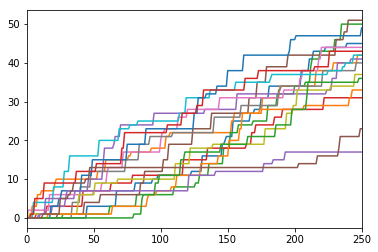

In [26]:
df[token_cols].plot(legend = False)

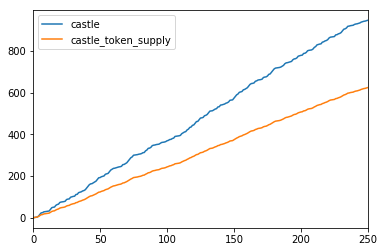

In [27]:
df[['castle','castle_token_supply']].plot()

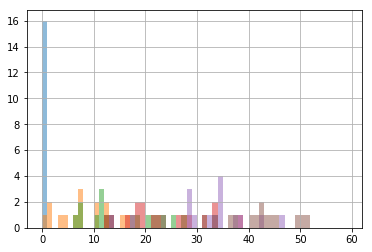

In [28]:
T = len(df[token_cols])

for t in range(T):
    if np.mod(t,50)==0:
        df[token_cols].iloc[t].hist(alpha=.5, bins=range(60))